<a href="https://colab.research.google.com/github/Bimal-Kumar-002/Lannet-Technologies-AutoML-AS1/blob/master/Lannet__AS1_for_Job.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.impute import SimpleImputer
import itertools
from datetime import datetime
import copy
import sys
import matplotlib.pyplot as plt
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1) Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.
Things to consider:

*   We consider outliers as incorrect entries and not the one which are natural For example, in the salary column, if there is a value of $1,000,000 then this value can be due to a natural cause (like it’s a salary for a CEO) or it can be a case of incorrect entry (like someone put an extra zero). So, we are only after incorrect entries.




In [2]:
df = pd.DataFrame({'Id':[i for i in range(1,16)],
                   'Date': pd.date_range(start='30/09/2019',end='30/12/2020',freq='M'),
                   'Date1': pd.date_range(start='30/09/2013',end='30/12/2014',freq='M'),
                   'Date2': pd.date_range(start='30/09/2016',end='30/12/2017',freq='M'),
                    'a': [1, 2,3,9,25] * 3,
                   'b': [True, False,False,True,False] * 3,
                   'c': [1.0, 2.0,35,np.nan,1.0] * 3,
                   'D': ['Female', 'other','Male',np.nan,'Male'] * 3,
                   'E' :list(np.random.normal(0,1,size=15))
                   })

In [3]:
df.head()

,Id,Date,Date1,Date2,a,b,c,D,E
0,1,2019-09-30,2013-09-30,2016-09-30,1,True,1.0,Female,0.079240
1,2,2019-10-31,2013-10-31,2016-10-31,2,False,2.0,other,1.384102
2,3,2019-11-30,2013-11-30,2016-11-30,3,False,35.0,Male,-0.636597
3,4,2019-12-31,2013-12-31,2016-12-31,9,True,NaN,NaN,0.431596
4,5,2020-01-31,2014-01-31,2017-01-31,25,False,1.0,Male,-0.060789


In [4]:
def select_feature_types(df):

  '''
  Objective:
      Identifies the columns with datatypes.
      
  Inputs: 
      dataframe: dataframe 
  
  Output: 
        dictionary of dataframe : key values paire of dataframe
'''
  df_set = {}
  for col_name in (df.columns.to_list()):
    try:
      if df[col_name].dtypes == 'object':
        object_df = df.select_dtypes(include=['object'])
        df_set['Object_df']= [object_df]
    except (sys.exc_info()[0]) as f1:
            print("Error:",f1)
    try:
        if df[col_name].dtypes == 'float64' or df[col_name].dtypes == 'int64':
            count_df = df.select_dtypes(include=['int64','float64',np.number])
            df_set['count_df']=[count_df]
    except (sys.exc_info()[0]) as f2:
            print("Error",f2)
    try :
        if df[col_name].dtypes == 'bool':
            bool_df = df.select_dtypes(include=['bool'])
            df_set['categorical_df']=[bool_df]
    except (sys.exc_info()[0]) as f3:
            print("Error:",f3)  

    try :
        if df[col_name].dtypes == 'category':
            categorical_df = df.select_dtypes(include=['category'])
            df_set['categorical_df']=[categorical_df]
    except (sys.exc_info()[0])as f4:
      #print("Error:",f4)
      pass

    try:
        if df[col_name].dtypes == 'datetime64' or df[col_name].dtypes == 'datetime64[ns]': 
            date_df = df.select_dtypes(include=['datetime64[ns]','datetime64'])
            df_set['date_df']=[date_df]
    except (sys.exc_info()[0]) as f5:
        print(f5)

    try:
        if df[col_name].dtypes =='datetimetz'or df[col_name].dtypes =='timedelta':
          date_df = df.select_dtypes(include=['datetimetz','timedelta'])
    except (UnboundLocalError,TypeError)as obj:
        pass
    else:
      pass
  print("-"*100)
  print("your data have following feature:\n",df.columns.to_list())
  return df_set
  

In [5]:
df_set=select_feature_types(df) 
df_set.keys()

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['Id', 'Date', 'Date1', 'Date2', 'a', 'b', 'c', 'D', 'E']


dict_keys(['count_df', 'date_df', 'categorical_df', 'Object_df'])

#Q.1 Write a function in python that inputs a dataframe and identify which columns have date in them. Using these date columns make new columns which are difference between these columns taking 2 at a time. (for instance if there is date1, date2, date3 columns, output should be like date1-date2, date2-date3, date1-date3). For this problem only, print out data in the colab. 

In [6]:
def date_differencer(df):
  '''
  Objective:
      Select date columns & Makes new columns which are difference between these columns taking 2 at a time.
      
  Inputs: 
      dataframe: dataframe from which columns with date is to be identified

  Output: 
      dataframe : dataframe with columns which have difference of days among original dataframe columns taken 2 at a time.
  '''
  df1 = select_feature_types(df)  # function call
  date_df = df1['date_df'][0]
  # difference between date columns taking 2 at a time
  date_combination_df = pd.DataFrame({'{}-{}'.format(a,b): df[a] - df[b] for a, b in itertools.combinations(date_df.columns.to_list(), 2)})
  print("-"*100)
  print('Difference between date:')
  print(date_combination_df)

In [7]:
date_differencer(df)

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['Id', 'Date', 'Date1', 'Date2', 'a', 'b', 'c', 'D', 'E']
----------------------------------------------------------------------------------------------------
Difference between date:
   Date-Date1 Date-Date2 Date1-Date2
0   2191 days  1095 days  -1096 days
1   2191 days  1095 days  -1096 days
2   2191 days  1095 days  -1096 days
3   2191 days  1095 days  -1096 days
4   2191 days  1095 days  -1096 days
5   2192 days  1096 days  -1096 days
6   2192 days  1096 days  -1096 days
7   2192 days  1096 days  -1096 days
8   2192 days  1096 days  -1096 days
9   2192 days  1096 days  -1096 days
10  2192 days  1096 days  -1096 days
11  2192 days  1096 days  -1096 days
12  2192 days  1096 days  -1096 days
13  2192 days  1096 days  -1096 days
14  2192 days  1096 days  -1096 days


# Q2. Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.

In [8]:
def remove_na_values(df):

  '''
  Objective:
    Identifies the columns with countious_feature & remove the na values.

  Inputs: 
    dataframe: dataframe 
  Output: 
    after outliers impute : impute nan values from continuous variables
  '''
  try:
    df1=select_feature_types(df) # function call
    count_df = df1['count_df'][0]
  except (sys.exc_info()[0]) as f:
    print("Error",f)
      # Total missing values
  try:    
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
      columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    # Sort the table by percentage of missing descending
    print('-'*100)
    mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
     # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
          "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
    print('-'*100)
    print(mis_val_table_ren_columns)
  except (sys.exe_info()[0]) as f1:
    #print("Error",f1)
    pass
  try:
    for Index in (count_df.columns.to_list()):
      countinous_df = count_df.fillna(df[Index].median())  
  except (sys.exe_info()) as f3:
    #print("Error:",f3) 
    pass
  return countinous_df
    

In [9]:
remove_na_values(df)

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['Id', 'Date', 'Date1', 'Date2', 'a', 'b', 'c', 'D', 'E']
----------------------------------------------------------------------------------------------------
Your selected dataframe has 9 columns.
There are 2 columns that have missing values.
----------------------------------------------------------------------------------------------------
   Missing Values  % of Total Values
c               3               20.0
D               3               20.0


,Id,a,c,E
0,1,1,1.00000,0.079240
1,2,2,2.00000,1.384102
2,3,3,35.00000,-0.636597
3,4,9,0.07924,0.431596
4,5,25,1.00000,-0.060789
5,6,1,1.00000,1.616634
6,7,2,2.00000,0.747237
7,8,3,35.00000,0.598600
8,9,9,0.07924,-0.724721
9,10,25,1.00000,0.245524


In [10]:
def remove_ouliers(df):
  
  '''
  Objective:
    Identifies the columns with countious_feature.
        
  Inputs:
    dataframe: dataframe 
    
  Output: 
  after outliers impute : impute outliers in all the continuous variables
  '''
  dataset2 = remove_na_values(df)
  fig = plt.figure(figsize=(25, 23))
  plt.suptitle('Before drop the outliers from dataset ', fontsize=25)
  for i in range(1, dataset2.shape[1] + 1):
      plt.subplot(4, 5, i)
      f = plt.gca()
      f.axes.get_yaxis().set_visible(True)
      f.set_title(dataset2.columns.values[i - 1])

      vals = np.size(dataset2.iloc[:, i - 1].unique())

      sn.boxplot(y=dataset2.iloc[:, i - 1], palette="Set2")

  plt.tight_layout(h_pad=0.8, w_pad=0.5 ,rect=[0, 0.03, 1, 0.95])
  plt.show()

  np.random.seed(11)
  data1 = copy.copy(dataset2)
  for idx in (data1.columns.to_list()):
    Q1,Q3 = data1[idx].quantile(0.25), data1[idx].quantile(0.75)
    IQR = Q3 - Q1
    # remove oulier with NaN values
    data1[idx] = data1[~((data1[[idx]] < (Q1 - 1.5 * IQR)) |(data1[[idx]] > (Q3 + 1.5 * IQR))).any(axis=1)]
    # remove NaN values with median
  try:
    for Index in (data1.columns.to_list()):
      data1_df = data1.fillna(df[Index].median())  
  except (sys.exe_info()) as f3:
    print("Error:",f3) 
    #pass
  
  fig = plt.figure(figsize=(25, 23))
  plt.suptitle('After outliers imputation ', fontsize=25)
  for i in range(1, data1_df.shape[1] + 1):
      plt.subplot(4, 5, i)
      f = plt.gca()
      f.axes.get_yaxis().set_visible(True)
      f.set_title(data1_df.columns.values[i - 1])

      vals = np.size(data1_df.iloc[:, i - 1].unique())

      sn.boxplot(y=data1_df.iloc[:, i - 1], palette="Set2")
      
  plt.tight_layout(h_pad=0.8, w_pad=0.5 ,rect=[0, 0.03, 1, 0.95])
  plt.show()

  return data1_df

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['Id', 'Date', 'Date1', 'Date2', 'a', 'b', 'c', 'D', 'E']
----------------------------------------------------------------------------------------------------
Your selected dataframe has 9 columns.
There are 2 columns that have missing values.
----------------------------------------------------------------------------------------------------
   Missing Values  % of Total Values
c               3               20.0
D               3               20.0


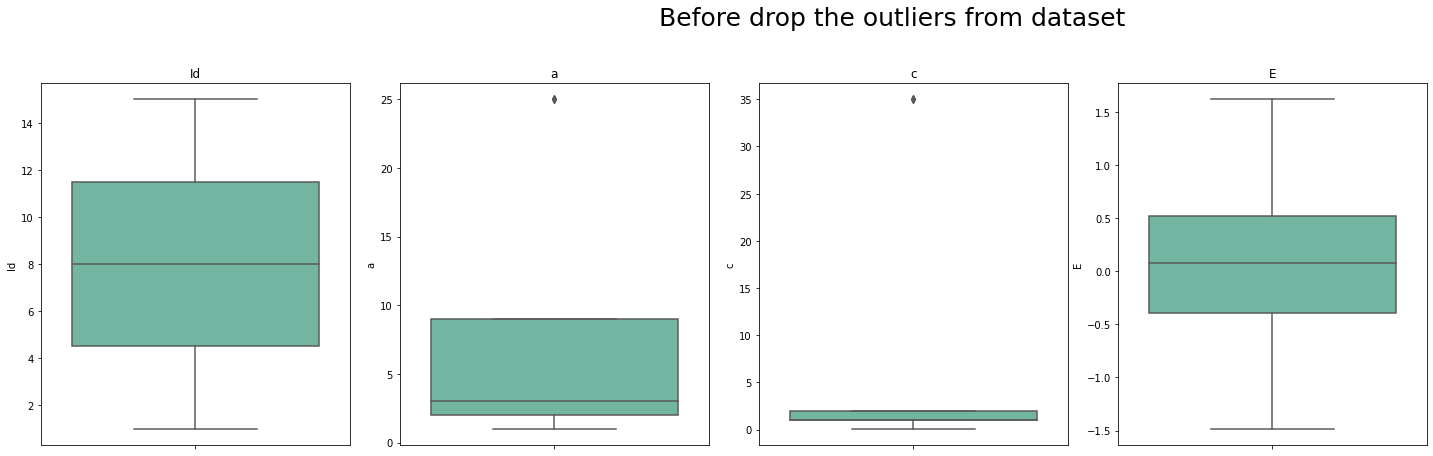

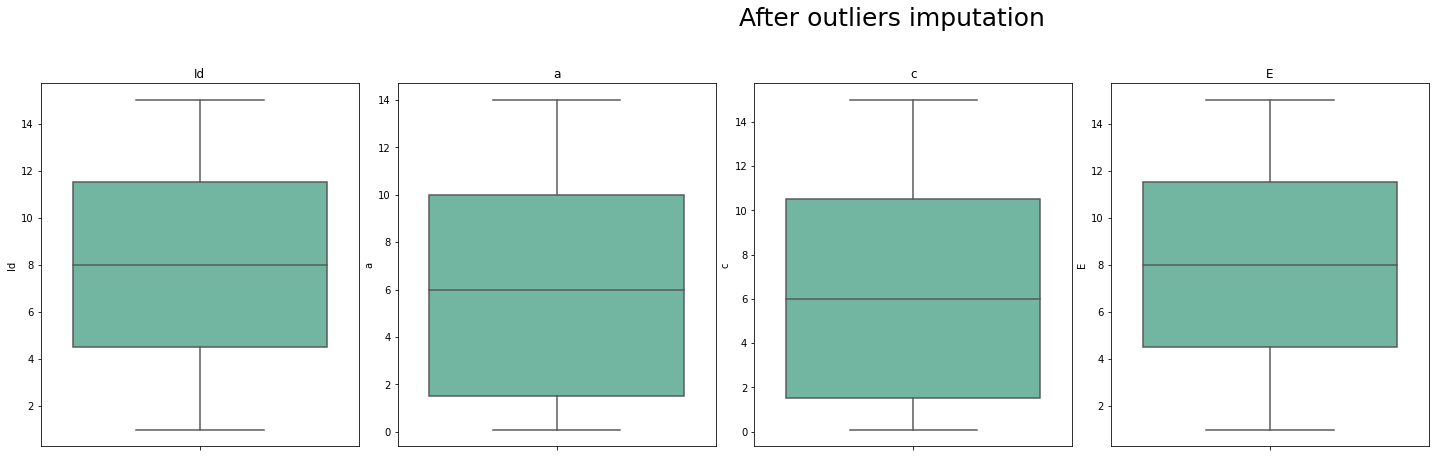

,Id,a,c,E
0,1.0,1.00000,1.00000,1.0
1,2.0,2.00000,2.00000,2.0
2,3.0,3.00000,0.07924,3.0
3,4.0,4.00000,4.00000,4.0
4,5.0,0.07924,5.00000,5.0
5,6.0,6.00000,6.00000,6.0
6,7.0,7.00000,7.00000,7.0
7,8.0,8.00000,0.07924,8.0
8,9.0,9.00000,9.00000,9.0
9,10.0,0.07924,10.00000,10.0


In [11]:
 remove_ouliers(df)

 3) Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85


In [12]:
def find_correlation(df,methods='pearson',threshold=0.85):
  '''
  Objective:
    Take countinous feature as a input, find the correlation 

  Inputs: 
    dataframe: dataframe 
  Output: 
    return a data frame which has correlation less than 0.85
  '''
    # Function call
  df_set = select_feature_types(df) 
  try:
    count_df = df_set['count_df'][0]
    df1 = count_df
  except:
    print(sys.exc_info()[0])
    print("plase make sure your dataset conatation continous feature")
  
  thresholds= threshold  #by default threshold
  try:
    corr_matrix= df1.corr(method=methods,min_periods=1)
  except (sys.exc_info()[0]) as f:
    print("Error:",f)

  # make upper trangular of the matix
  upper_trangular = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  upper_trangular = np.round(upper_trangular,decimals=2)

  # plot correlation fig
  plt.figure(figsize = (20,9))
  mask = np.zeros_like(corr_matrix)
  mask[np.triu_indices_from(mask)] = True
  with sn.axes_style("white"):
    sn.heatmap(np.round(corr_matrix,decimals=2), annot=True,mask=mask, fmt="g",cmap="YlGnBu")
    sn.set(font_scale=1.4)
    plt.xticks(rotation=90)
  plt.show()  
    
  # derop the correlated feature 
  if threshold>0:
      drop_feature = [column for column in upper_trangular.columns if any(upper_trangular[column] > threshold)]
      if len(drop_feature) == 0:
        print('\n')
        print('-'*100)
        print("from your dataset non of the feature are droped at threshold "+str(threshold))
      else:
        print('\n')
        print('-'*100)
        print("Following feature are droped from your dataset at threshold " +str(threshold) +":\n",drop_feature)
        df.drop(drop_feature,axis=1,inplace=True)
  else:
      pass # do nothing 
      # return dataset after drop correlated features

  
  return df

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['Id', 'Date', 'Date1', 'Date2', 'a', 'b', 'c', 'D', 'E']


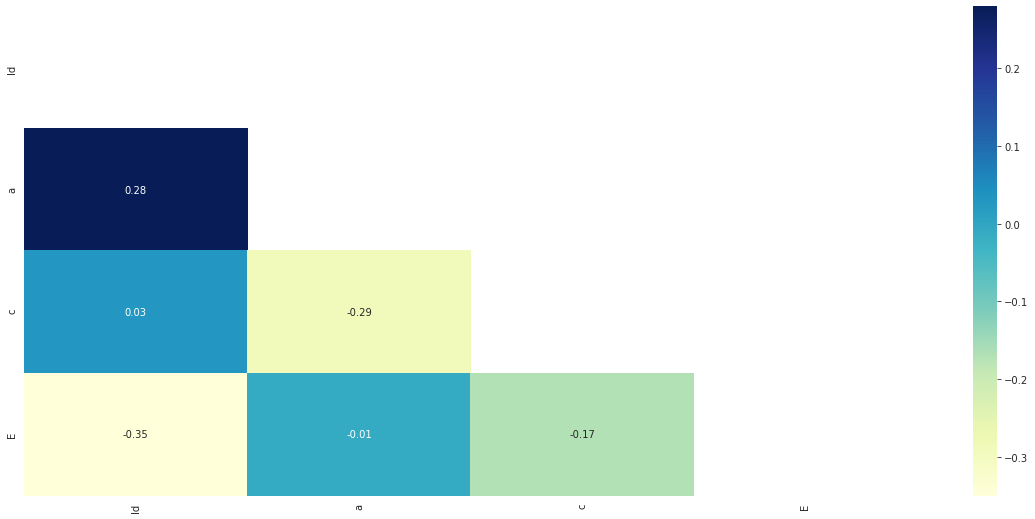



----------------------------------------------------------------------------------------------------
from your dataset non of the feature are droped at threshold 0.8


In [13]:
df3=find_correlation(df,methods='pearson',threshold=0.8)

# Check the concept on different dataset

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
dataframe = pd.read_csv("/content/drive/My Drive/Internshala_internship/Lannet Technologies/Date/kc_house_data.csv")

In [16]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
dataframe.drop(['id','yr_renovated','zipcode','lat','long'],axis=1,inplace=True)

In [18]:
dataframe['date']=pd.to_datetime(dataframe['date'],errors='coerce',infer_datetime_format=True)

In [19]:
dataframe.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [20]:
date_differencer(dataframe)

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
----------------------------------------------------------------------------------------------------
Difference between date:
Empty DataFrame
Columns: []
Index: []


----------------------------------------------------------------------------------------------------
your data have following feature:
 ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']
----------------------------------------------------------------------------------------------------
Your selected dataframe has 16 columns.
There are 0 columns that have missing values.
----------------------------------------------------------------------------------------------------
Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []


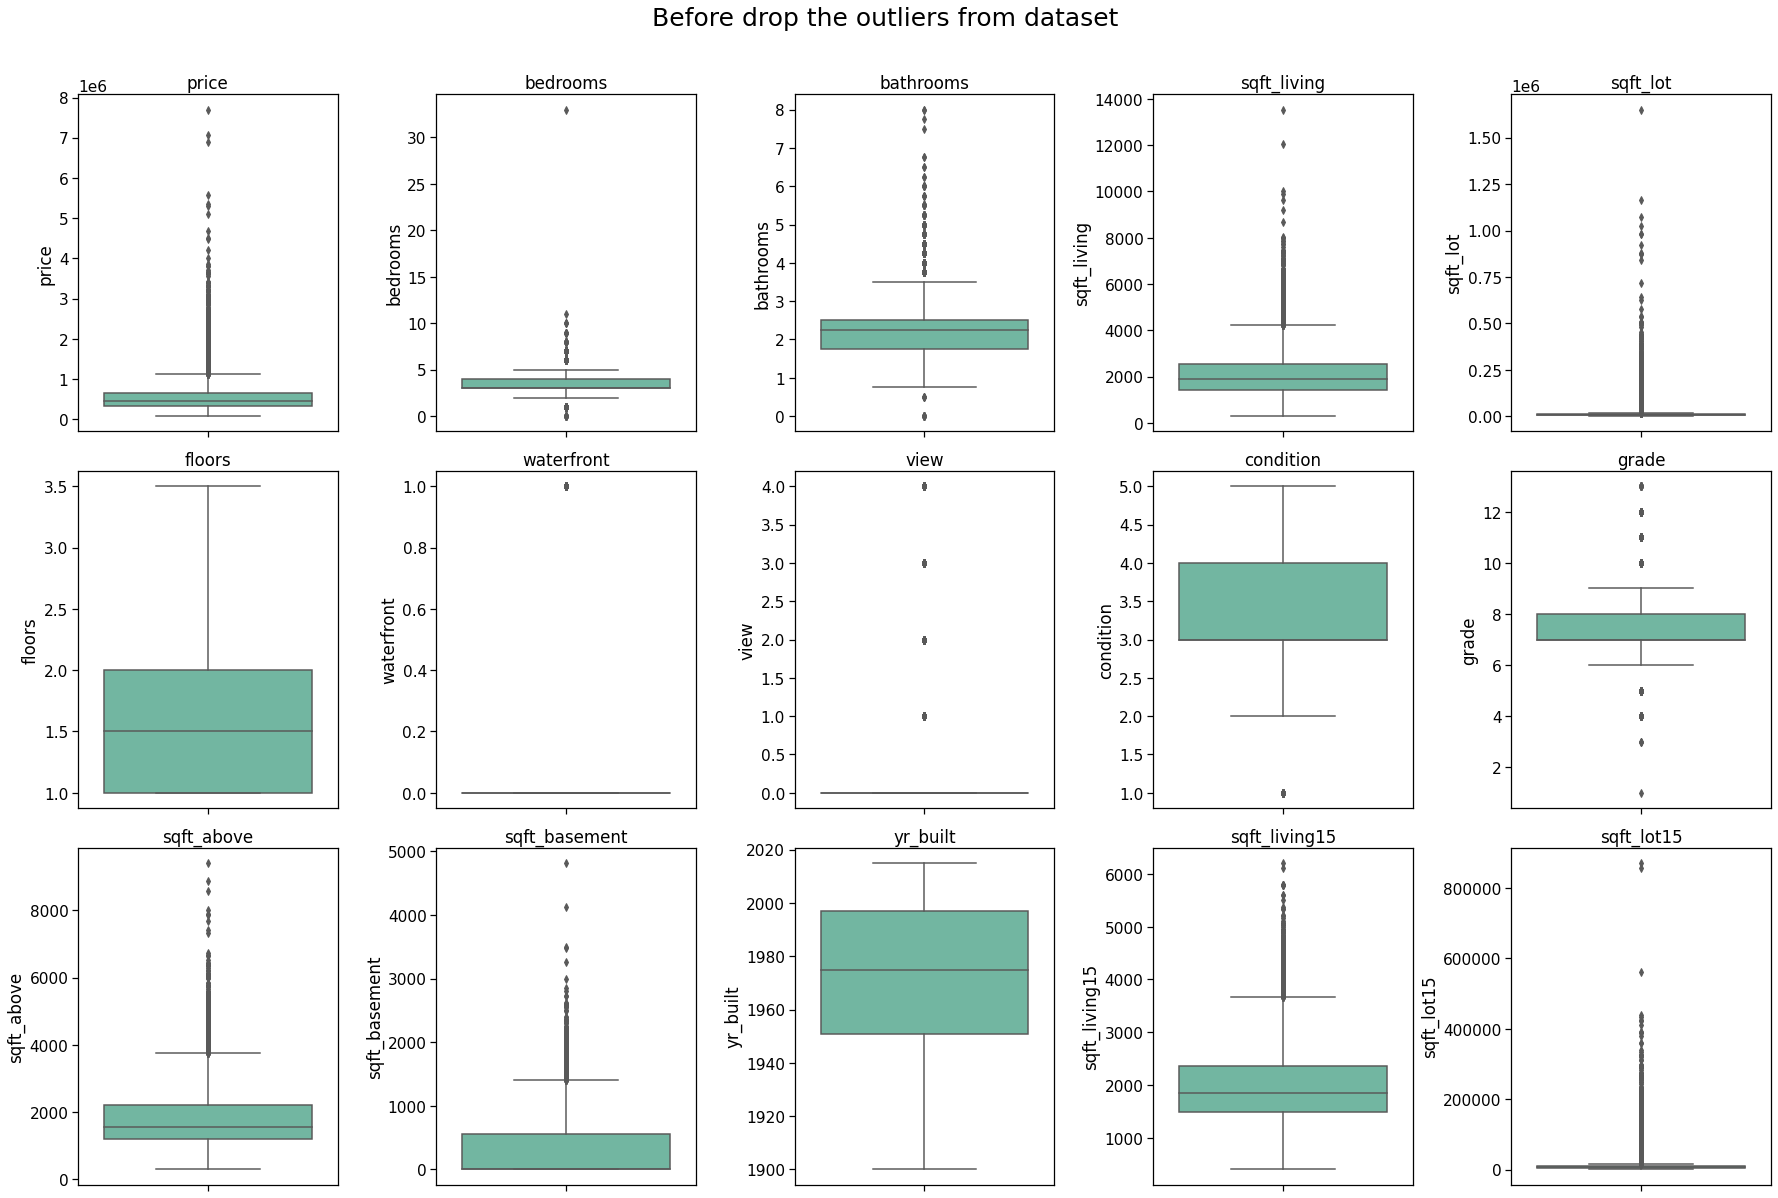

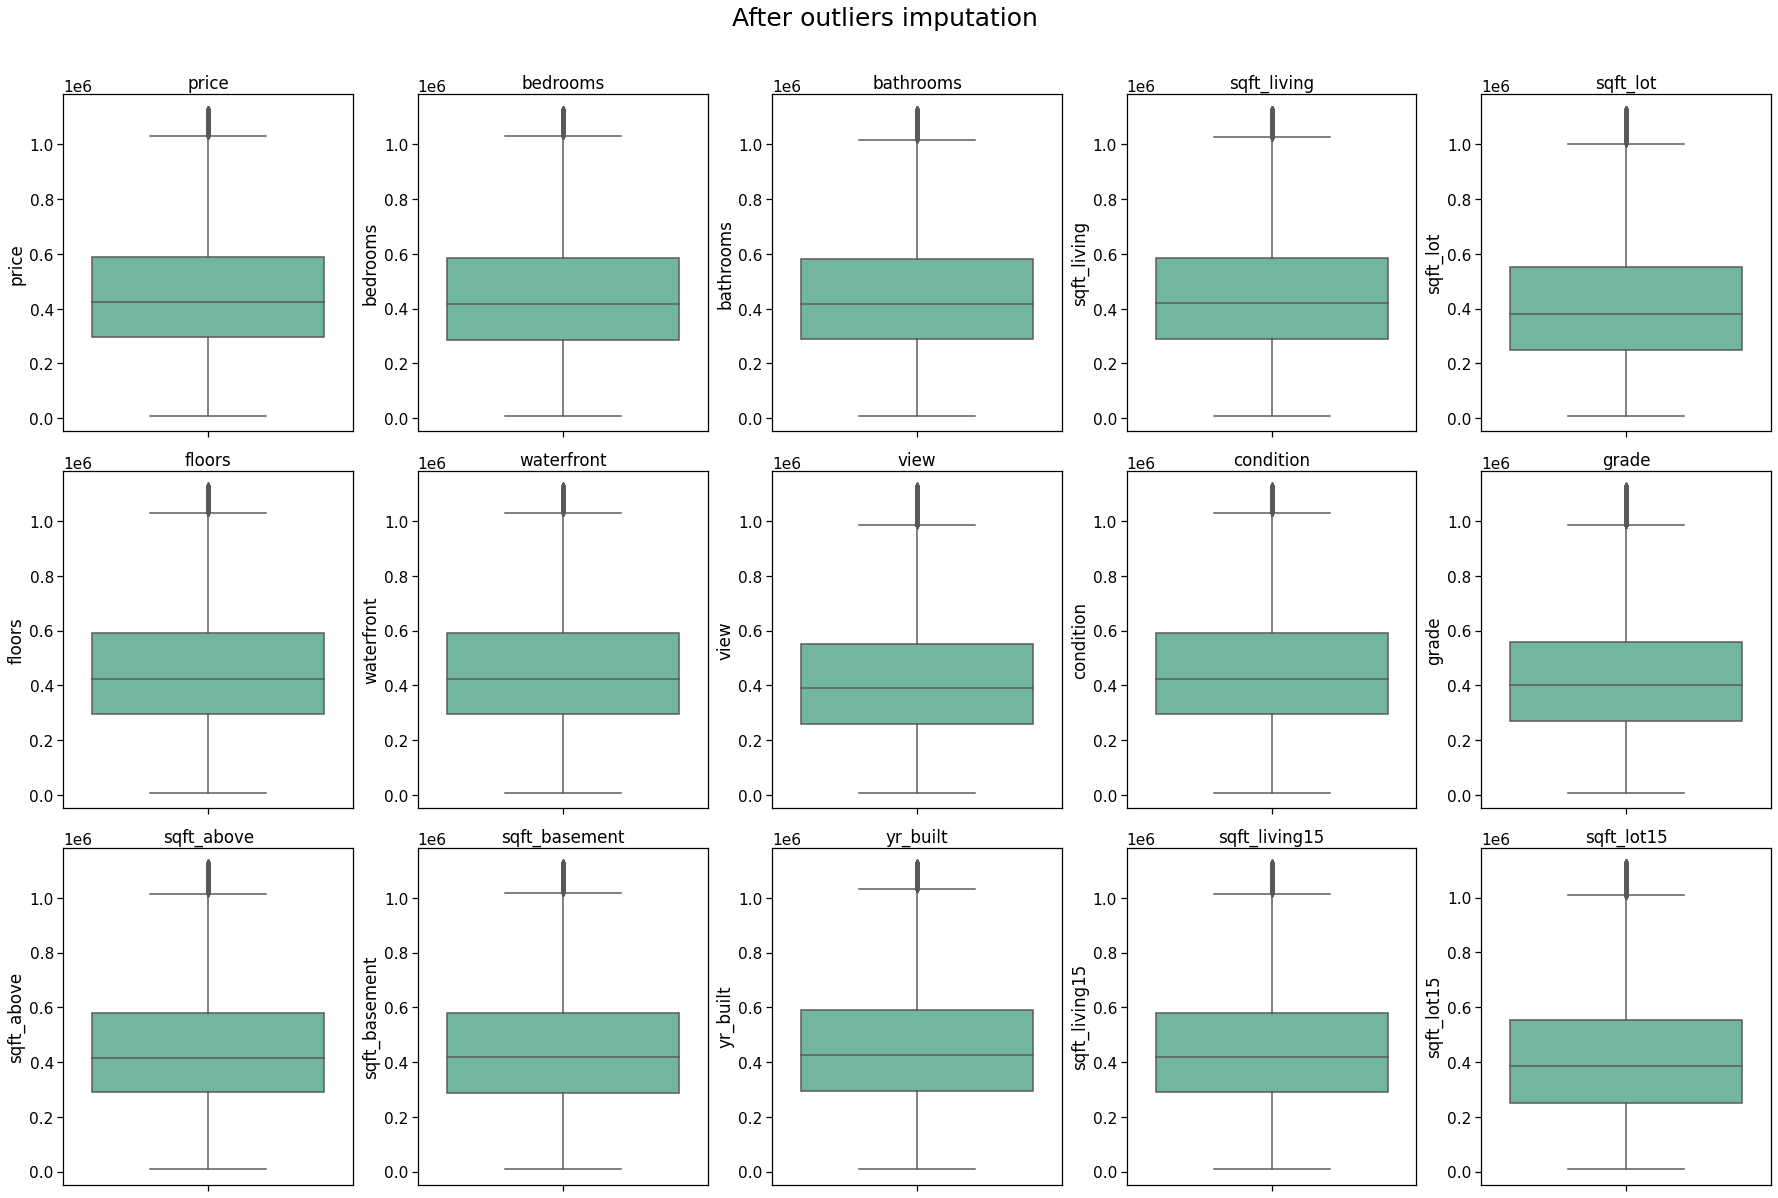

In [21]:
 dataframe1=remove_ouliers(dataframe)

----------------------------------------------------------------------------------------------------
your data have following feature:
 ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']


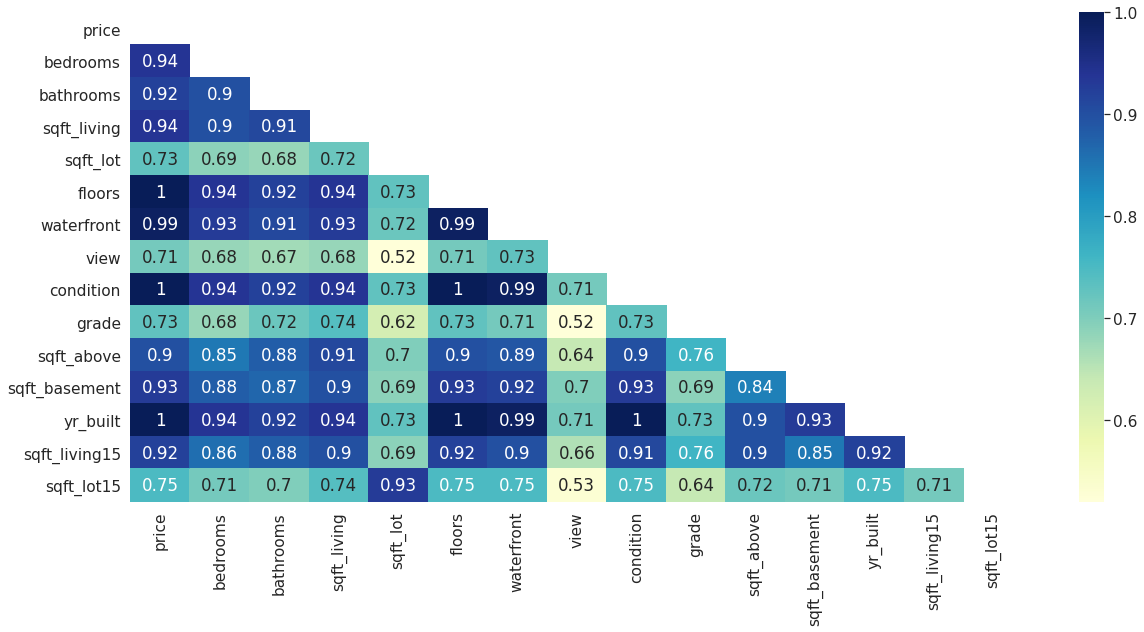



----------------------------------------------------------------------------------------------------
Following feature are droped from your dataset at threshold 0.8:
 ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']


In [22]:
dataframe2=find_correlation(dataframe1,methods='pearson',threshold=0.8)